This file represnet the baseline notebook.

In [1]:
#Add all imports required
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from utils import *


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Define your classes
GENERAL_CLASSES = ['Fetal abdomen', 'Fetal brain', 'Fetal femur', 
                   'Fetal thorax', 'Maternal cervix', 'Other']
CLASS_TO_IDX = {cls: idx for idx, cls in enumerate(GENERAL_CLASSES)}


csv_path = 'FETAL_PLANES_DB_data.csv'
image_dir = './Images/'
#batch_size = 16
#epochs = 15
#lr = 1e-4 # original
# epochs = 20 
# lr = 1e-3 // updated 1
# epochs = 50
# lr = 5e-4
# transform = transforms.Compose([#transformer 1
#     transforms.Resize((128, 128)), #// original
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5])
# ])
# transform = transforms.Compose([ # transformer 2
#     transforms.Resize((224, 224)),
#    # transforms.Resize((128, 128)), // original
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5])
# ])
# transform = transforms.Compose([ # transformer 3
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5])  # Single channel
# ])


Using device: cuda


************* First Run *****************


Training Epoch 1/8: 100%|██████████| 446/446 [00:47<00:00,  9.49it/s]


Epoch 1, Loss: 0.7056
Test Accuracy: 0.7862

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.56      0.03      0.05       358
    Fetal brain       0.99      0.90      0.95      1472
    Fetal femur       0.81      0.63      0.71       524
   Fetal thorax       0.61      0.86      0.71       660
Maternal cervix       0.86      0.98      0.92       645
          Other       0.69      0.79      0.74      1612

       accuracy                           0.79      5271
      macro avg       0.75      0.70      0.68      5271
   weighted avg       0.79      0.79      0.77      5271

Confusion Matrix:
 [[  10    0    3  109   21  215]
 [   4 1330   20   40    9   69]
 [   0    1  330    5    2  186]
 [   2    0    2  569    2   85]
 [   0    0    1    2  634    8]
 [   2    8   52  213   66 1271]]


Training Epoch 2/8: 100%|██████████| 446/446 [00:46<00:00,  9.50it/s]


Epoch 2, Loss: 0.3823
Test Accuracy: 0.7983

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.80      0.22      0.35       358
    Fetal brain       0.93      0.99      0.96      1472
    Fetal femur       0.80      0.75      0.77       524
   Fetal thorax       0.47      0.99      0.64       660
Maternal cervix       0.99      0.98      0.99       645
          Other       0.91      0.62      0.74      1612

       accuracy                           0.80      5271
      macro avg       0.82      0.76      0.74      5271
   weighted avg       0.85      0.80      0.79      5271

Confusion Matrix:
 [[  80   11    2  223    0   42]
 [   0 1452    2   12    0    6]
 [   1   23  392   65    0   43]
 [   1    3    1  652    0    3]
 [   1    2    1    6  635    0]
 [  17   73   94  425    6  997]]


Training Epoch 3/8: 100%|██████████| 446/446 [00:46<00:00,  9.56it/s]


Epoch 3, Loss: 0.2788
Test Accuracy: 0.8543

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.87      0.39      0.53       358
    Fetal brain       0.98      0.97      0.97      1472
    Fetal femur       0.94      0.51      0.66       524
   Fetal thorax       0.73      0.93      0.82       660
Maternal cervix       0.98      1.00      0.99       645
          Other       0.76      0.88      0.81      1612

       accuracy                           0.85      5271
      macro avg       0.88      0.78      0.80      5271
   weighted avg       0.87      0.85      0.85      5271

Confusion Matrix:
 [[ 138    8    0   76    0  136]
 [   1 1425    0   14    1   31]
 [   0    4  265    7    1  247]
 [   1    1    0  616    0   42]
 [   0    0    0    0  643    2]
 [  19   17   16  132   12 1416]]


Training Epoch 4/8: 100%|██████████| 446/446 [00:47<00:00,  9.31it/s]


Epoch 4, Loss: 0.2232
Test Accuracy: 0.8774

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.69      0.86      0.77       358
    Fetal brain       0.97      0.99      0.98      1472
    Fetal femur       0.83      0.85      0.84       524
   Fetal thorax       0.70      0.96      0.81       660
Maternal cervix       0.98      1.00      0.99       645
          Other       0.94      0.71      0.81      1612

       accuracy                           0.88      5271
      macro avg       0.85      0.89      0.86      5271
   weighted avg       0.89      0.88      0.88      5271

Confusion Matrix:
 [[ 309    2    2   32    0   13]
 [   4 1453    2    9    0    4]
 [   4   12  447   11    0   50]
 [  13    3    0  634    0   10]
 [   1    0    0    0  644    0]
 [ 118   34   89  220   13 1138]]


Training Epoch 5/8: 100%|██████████| 446/446 [01:27<00:00,  5.10it/s]


Epoch 5, Loss: 0.1837
Test Accuracy: 0.8943

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.79      0.83      0.81       358
    Fetal brain       0.99      0.98      0.99      1472
    Fetal femur       0.82      0.84      0.83       524
   Fetal thorax       0.74      0.96      0.84       660
Maternal cervix       0.97      1.00      0.98       645
          Other       0.91      0.78      0.84      1612

       accuracy                           0.89      5271
      macro avg       0.87      0.90      0.88      5271
   weighted avg       0.90      0.89      0.89      5271

Confusion Matrix:
 [[ 297    1    1   30    1   28]
 [   3 1448    2    7    4    8]
 [   0    0  441    7    2   74]
 [   8    1    1  633    0   17]
 [   1    0    0    0  644    0]
 [  67   13   91  178   12 1251]]


Training Epoch 6/8: 100%|██████████| 446/446 [01:33<00:00,  4.75it/s]


Epoch 6, Loss: 0.1402
Test Accuracy: 0.8926

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.78      0.82      0.80       358
    Fetal brain       0.98      0.98      0.98      1472
    Fetal femur       0.90      0.73      0.81       524
   Fetal thorax       0.76      0.95      0.84       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.87      0.82      0.84      1612

       accuracy                           0.89      5271
      macro avg       0.88      0.88      0.88      5271
   weighted avg       0.90      0.89      0.89      5271

Confusion Matrix:
 [[ 292    1    0   18    2   45]
 [   3 1449    1    8    0   11]
 [   0    4  382   22    0  116]
 [   8    0    0  628    0   24]
 [   1    0    1    0  640    3]
 [  70   26   41  155    6 1314]]


Training Epoch 7/8: 100%|██████████| 446/446 [01:34<00:00,  4.73it/s]


Epoch 7, Loss: 0.1238
Test Accuracy: 0.8938

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.69      0.89      0.78       358
    Fetal brain       0.98      0.99      0.98      1472
    Fetal femur       0.81      0.88      0.84       524
   Fetal thorax       0.81      0.93      0.87       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.91      0.75      0.83      1612

       accuracy                           0.89      5271
      macro avg       0.86      0.91      0.88      5271
   weighted avg       0.90      0.89      0.89      5271

Confusion Matrix:
 [[ 318    3    1   12    0   24]
 [   5 1458    1    3    0    5]
 [   0    3  463    1    0   57]
 [  11    2    0  616    0   31]
 [   1    0    1    0  639    4]
 [ 123   27  108  130    7 1217]]


Training Epoch 8/8: 100%|██████████| 446/446 [01:35<00:00,  4.68it/s]


Epoch 8, Loss: 0.1007
Test Accuracy: 0.8926

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.76      0.89      0.82       358
    Fetal brain       0.99      0.99      0.99      1472
    Fetal femur       0.87      0.85      0.86       524
   Fetal thorax       0.71      0.97      0.82       660
Maternal cervix       0.99      1.00      0.99       645
          Other       0.91      0.75      0.82      1612

       accuracy                           0.89      5271
      macro avg       0.87      0.91      0.88      5271
   weighted avg       0.90      0.89      0.89      5271

Confusion Matrix:
 [[ 320    1    0   18    0   19]
 [   3 1451    1    8    0    9]
 [   2    1  443    9    0   69]
 [   4    0    0  640    0   16]
 [   1    0    0    0  643    1]
 [  89   19   67  224    5 1208]]


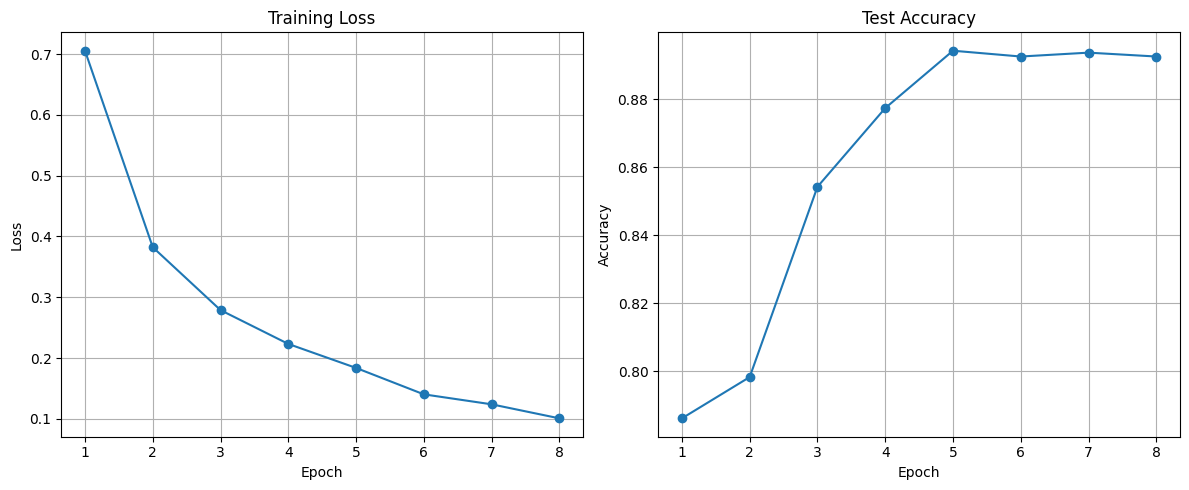

{5: {'loss': '0.1837', 'accuracy': '0.8943'}}


In [4]:
#First run:
print("************* First Run *****************")
batch_size = 16
epochs = 8
lr = 1e-4
transform = transforms.Compose([#transformer 1
    transforms.Resize((128, 128)), #// original
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_loader, test_loader = load_data(csv_path, image_dir, batch_size, transform)

model = CNNImproved(num_classes=len(GENERAL_CLASSES))
train(model, train_loader, test_loader, epochs, lr)


Training Epoch 1/15: 100%|██████████| 446/446 [02:33<00:00,  2.90it/s]


Epoch 1, Loss: 0.8228
Test Accuracy: 0.7718

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.40      0.02      0.04       358
    Fetal brain       0.94      0.89      0.91      1472
    Fetal femur       0.76      0.70      0.73       524
   Fetal thorax       0.54      0.80      0.65       660
Maternal cervix       0.98      0.98      0.98       645
          Other       0.70      0.75      0.73      1612

       accuracy                           0.77      5271
      macro avg       0.72      0.69      0.67      5271
   weighted avg       0.77      0.77      0.75      5271

Confusion Matrix:
 [[   8   10   10  145    0  185]
 [   1 1312   15   29    4  111]
 [   2   33  369   13    0  107]
 [   2    7    7  530    1  113]
 [   0    5    0    0  635    5]
 [   7   30   85  265   11 1214]]


Training Epoch 2/15: 100%|██████████| 446/446 [02:32<00:00,  2.92it/s]


Epoch 2, Loss: 0.5048
Test Accuracy: 0.7932

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.62      0.08      0.15       358
    Fetal brain       0.93      0.96      0.95      1472
    Fetal femur       0.85      0.56      0.68       524
   Fetal thorax       0.72      0.63      0.67       660
Maternal cervix       0.93      0.98      0.95       645
          Other       0.66      0.86      0.75      1612

       accuracy                           0.79      5271
      macro avg       0.79      0.68      0.69      5271
   weighted avg       0.79      0.79      0.77      5271

Confusion Matrix:
 [[  30   17    2   57    6  246]
 [   0 1416    8    2    5   41]
 [   0   38  295    2   11  178]
 [   2   13    0  413    3  229]
 [   0    0    0    0  633   12]
 [  16   40   41   98   23 1394]]


Training Epoch 3/15: 100%|██████████| 446/446 [01:49<00:00,  4.08it/s]


Epoch 3, Loss: 0.4141
Test Accuracy: 0.8154

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.71      0.20      0.31       358
    Fetal brain       0.97      0.93      0.95      1472
    Fetal femur       0.85      0.68      0.76       524
   Fetal thorax       0.69      0.75      0.72       660
Maternal cervix       0.93      1.00      0.96       645
          Other       0.70      0.85      0.77      1612

       accuracy                           0.82      5271
      macro avg       0.81      0.73      0.74      5271
   weighted avg       0.82      0.82      0.80      5271

Confusion Matrix:
 [[  70    6    5   83    7  187]
 [   2 1363    2   15    5   85]
 [   0   12  358    1    6  147]
 [   5    6    0  493    2  154]
 [   0    0    0    0  643    2]
 [  22   14   56  121   28 1371]]


Training Epoch 4/15: 100%|██████████| 446/446 [01:55<00:00,  3.86it/s]


Epoch 4, Loss: 0.3618
Test Accuracy: 0.8363

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.70      0.54      0.61       358
    Fetal brain       0.99      0.91      0.95      1472
    Fetal femur       0.88      0.68      0.77       524
   Fetal thorax       0.74      0.73      0.73       660
Maternal cervix       0.99      0.98      0.99       645
          Other       0.72      0.87      0.79      1612

       accuracy                           0.84      5271
      macro avg       0.84      0.79      0.81      5271
   weighted avg       0.85      0.84      0.84      5271

Confusion Matrix:
 [[ 195    1    0   48    0  114]
 [  12 1333    8   22    1   96]
 [   3    1  357    1    0  162]
 [  14    0    0  480    0  166]
 [   0    0    0    1  634   10]
 [  55   10   40   95    3 1409]]


Training Epoch 5/15: 100%|██████████| 446/446 [01:59<00:00,  3.73it/s]


Epoch 5, Loss: 0.3056
Test Accuracy: 0.8367

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.79      0.47      0.59       358
    Fetal brain       0.98      0.98      0.98      1472
    Fetal femur       0.76      0.92      0.83       524
   Fetal thorax       0.55      0.95      0.69       660
Maternal cervix       0.99      1.00      0.99       645
          Other       0.91      0.64      0.75      1612

       accuracy                           0.84      5271
      macro avg       0.83      0.83      0.81      5271
   weighted avg       0.87      0.84      0.84      5271

Confusion Matrix:
 [[ 168    3    6  133    0   48]
 [   3 1449    4   10    1    5]
 [   2    3  483   13    0   23]
 [   4    1    3  629    0   23]
 [   1    0    0    0  644    0]
 [  35   27  138  367    8 1037]]


Training Epoch 6/15: 100%|██████████| 446/446 [02:40<00:00,  2.78it/s]


Epoch 6, Loss: 0.2772
Test Accuracy: 0.8864

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.82      0.63      0.71       358
    Fetal brain       0.97      0.98      0.98      1472
    Fetal femur       0.81      0.89      0.85       524
   Fetal thorax       0.76      0.90      0.83       660
Maternal cervix       0.98      0.99      0.99       645
          Other       0.86      0.81      0.83      1612

       accuracy                           0.89      5271
      macro avg       0.87      0.87      0.86      5271
   weighted avg       0.89      0.89      0.89      5271

Confusion Matrix:
 [[ 224    7    1   47    0   79]
 [   3 1444    3    4    1   17]
 [   0    3  466    0    1   54]
 [   3    2    1  593    0   61]
 [   1    0    1    0  640    3]
 [  41   26  100  132    8 1305]]


Training Epoch 7/15: 100%|██████████| 446/446 [02:19<00:00,  3.19it/s]


Epoch 7, Loss: 0.2470
Test Accuracy: 0.8714

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.85      0.63      0.72       358
    Fetal brain       0.99      0.97      0.98      1472
    Fetal femur       0.89      0.81      0.85       524
   Fetal thorax       0.62      0.98      0.76       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.88      0.76      0.82      1612

       accuracy                           0.87      5271
      macro avg       0.87      0.86      0.85      5271
   weighted avg       0.89      0.87      0.87      5271

Confusion Matrix:
 [[ 225    1    0   82    0   50]
 [   4 1423    2   20    1   22]
 [   0    1  424    8    0   91]
 [   2    0    1  648    0    9]
 [   1    0    0    3  641    0]
 [  33   12   47  284    4 1232]]


Training Epoch 8/15: 100%|██████████| 446/446 [00:58<00:00,  7.61it/s]


Epoch 8, Loss: 0.2148
Test Accuracy: 0.8765

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.72      0.87      0.79       358
    Fetal brain       0.97      0.98      0.98      1472
    Fetal femur       0.76      0.90      0.82       524
   Fetal thorax       0.72      0.96      0.82       660
Maternal cervix       0.98      1.00      0.99       645
          Other       0.93      0.69      0.79      1612

       accuracy                           0.88      5271
      macro avg       0.85      0.90      0.87      5271
   weighted avg       0.89      0.88      0.88      5271

Confusion Matrix:
 [[ 313    1    5   30    1    8]
 [   4 1446   10    5    1    6]
 [   1    1  474    4    0   44]
 [   4    0    1  635    0   20]
 [   1    0    0    1  643    0]
 [ 114   38  137  206    8 1109]]


Training Epoch 9/15: 100%|██████████| 446/446 [00:59<00:00,  7.44it/s]


Epoch 9, Loss: 0.1999
Test Accuracy: 0.9002

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.86      0.82      0.84       358
    Fetal brain       0.99      0.98      0.99      1472
    Fetal femur       0.85      0.87      0.86       524
   Fetal thorax       0.72      0.93      0.81       660
Maternal cervix       0.99      1.00      0.99       645
          Other       0.90      0.80      0.85      1612

       accuracy                           0.90      5271
      macro avg       0.89      0.90      0.89      5271
   weighted avg       0.91      0.90      0.90      5271

Confusion Matrix:
 [[ 292    0    0   39    0   27]
 [   3 1443    1    8    2   15]
 [   0    1  458    9    0   56]
 [   5    0    0  613    0   42]
 [   1    0    0    0  643    1]
 [  40   13   81  178    4 1296]]


Training Epoch 10/15: 100%|██████████| 446/446 [01:56<00:00,  3.83it/s]


Epoch 10, Loss: 0.1799
Test Accuracy: 0.9015

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.85      0.71      0.77       358
    Fetal brain       0.98      0.99      0.99      1472
    Fetal femur       0.84      0.85      0.85       524
   Fetal thorax       0.80      0.91      0.85       660
Maternal cervix       0.99      1.00      0.99       645
          Other       0.87      0.84      0.85      1612

       accuracy                           0.90      5271
      macro avg       0.89      0.88      0.88      5271
   weighted avg       0.90      0.90      0.90      5271

Confusion Matrix:
 [[ 254    4    0   30    0   70]
 [   3 1458    1    4    1    5]
 [   0    2  448    1    0   73]
 [   2    1    1  601    0   55]
 [   1    0    0    0  643    1]
 [  38   23   82  117    4 1348]]


Training Epoch 11/15: 100%|██████████| 446/446 [01:57<00:00,  3.79it/s]


Epoch 11, Loss: 0.1629
Test Accuracy: 0.8907

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.86      0.75      0.80       358
    Fetal brain       0.98      0.99      0.98      1472
    Fetal femur       0.78      0.94      0.85       524
   Fetal thorax       0.72      0.96      0.82       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.93      0.75      0.83      1612

       accuracy                           0.89      5271
      macro avg       0.87      0.90      0.88      5271
   weighted avg       0.90      0.89      0.89      5271

Confusion Matrix:
 [[ 267    9    1   44    0   37]
 [   3 1462    3    1    0    3]
 [   0    2  492    1    0   29]
 [   3    1    0  632    0   24]
 [   1    0    0    0  640    4]
 [  38   25  135  204    8 1202]]


Training Epoch 12/15: 100%|██████████| 446/446 [01:56<00:00,  3.83it/s]


Epoch 12, Loss: 0.1492
Test Accuracy: 0.9059

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.79      0.90      0.84       358
    Fetal brain       0.99      0.98      0.98      1472
    Fetal femur       0.89      0.83      0.86       524
   Fetal thorax       0.79      0.94      0.86       660
Maternal cervix       0.97      1.00      0.99       645
          Other       0.89      0.81      0.85      1612

       accuracy                           0.91      5271
      macro avg       0.89      0.91      0.90      5271
   weighted avg       0.91      0.91      0.91      5271

Confusion Matrix:
 [[ 322    1    0   15    0   20]
 [   3 1445    2    5    1   16]
 [   0    1  433    1    0   89]
 [   5    1    0  620    0   34]
 [   1    0    0    0  643    1]
 [  75   16   53  140   16 1312]]


Training Epoch 13/15: 100%|██████████| 446/446 [01:56<00:00,  3.83it/s]


Epoch 13, Loss: 0.1479
Test Accuracy: 0.8839

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.88      0.81      0.84       358
    Fetal brain       0.99      0.97      0.98      1472
    Fetal femur       0.91      0.66      0.76       524
   Fetal thorax       0.75      0.94      0.83       660
Maternal cervix       0.94      0.99      0.96       645
          Other       0.83      0.83      0.83      1612

       accuracy                           0.88      5271
      macro avg       0.88      0.87      0.87      5271
   weighted avg       0.89      0.88      0.88      5271

Confusion Matrix:
 [[ 291    0    0   31    2   34]
 [   3 1422    0   14    5   28]
 [   0    0  345    3    0  176]
 [   2    0    0  618    1   39]
 [   1    0    1    2  638    3]
 [  34    9   35  156   33 1345]]


Training Epoch 14/15: 100%|██████████| 446/446 [01:55<00:00,  3.85it/s]


Epoch 14, Loss: 0.1318
Test Accuracy: 0.9061

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.84      0.89      0.87       358
    Fetal brain       0.99      0.98      0.98      1472
    Fetal femur       0.86      0.78      0.81       524
   Fetal thorax       0.86      0.88      0.87       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.85      0.86      0.86      1612

       accuracy                           0.91      5271
      macro avg       0.90      0.90      0.90      5271
   weighted avg       0.91      0.91      0.91      5271

Confusion Matrix:
 [[ 319    0    0    6    0   33]
 [   3 1440    3    3    2   21]
 [   0    0  407    0    0  117]
 [   4    0    2  579    0   75]
 [   1    0    0    0  638    6]
 [  51   16   63   84    5 1393]]


Training Epoch 15/15: 100%|██████████| 446/446 [01:56<00:00,  3.82it/s]


Epoch 15, Loss: 0.1188
Test Accuracy: 0.9186

Classification Report:
                 precision    recall  f1-score   support

  Fetal abdomen       0.86      0.86      0.86       358
    Fetal brain       0.99      0.99      0.99      1472
    Fetal femur       0.84      0.89      0.86       524
   Fetal thorax       0.85      0.92      0.88       660
Maternal cervix       0.99      0.99      0.99       645
          Other       0.90      0.84      0.87      1612

       accuracy                           0.92      5271
      macro avg       0.90      0.92      0.91      5271
   weighted avg       0.92      0.92      0.92      5271

Confusion Matrix:
 [[ 307    3    0   12    2   34]
 [   3 1458    3    0    0    8]
 [   0    0  468    0    0   56]
 [   4    0    0  607    0   49]
 [   1    0    1    0  641    2]
 [  44   17   87   96    7 1361]]


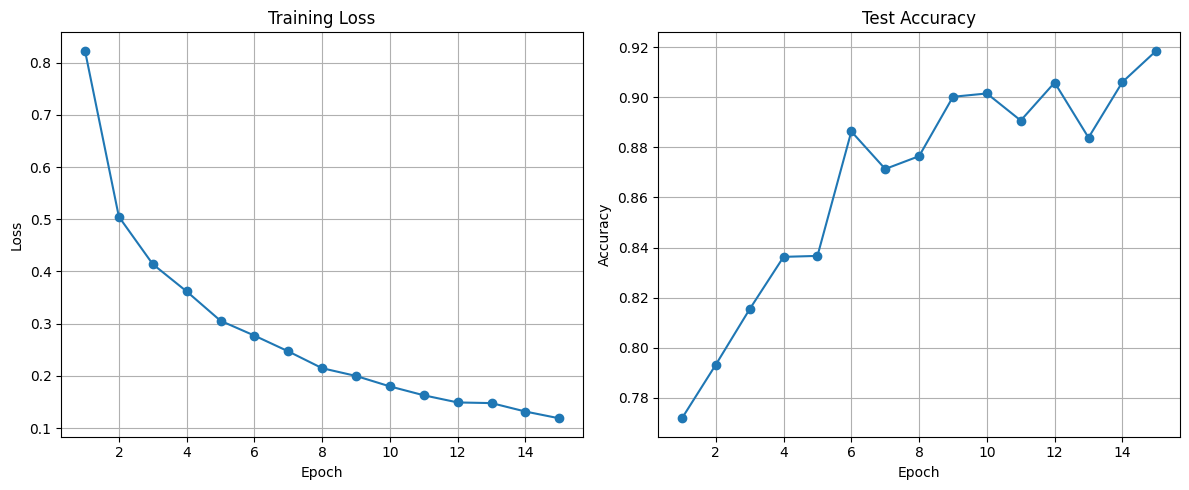

{5: {'loss': '0.3056', 'accuracy': '0.8367'}, 10: {'loss': '0.1799', 'accuracy': '0.9015'}, 15: {'loss': '0.1188', 'accuracy': '0.9186'}}


In [5]:
batch_size = 16
epochs = 15
lr = 1e-4 # original
transform = transforms.Compose([ # transformer 3
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Single channel
])
train_loader, test_loader = load_data(csv_path, image_dir, batch_size, transform)

model = CNNImproved(num_classes=len(GENERAL_CLASSES))
train(model, train_loader, test_loader, epochs, lr)